<a href="https://www.kaggle.com/code/salohiddinali/airplane-ticket-prediction?scriptVersionId=216791169" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv
/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv
/kaggle/input/aviachipta-narxini-bashorat-qilish/sample_solution.csv


In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Data

In [9]:
test_df=pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv")
train_df=pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv")
sample=pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/sample_solution.csv")

test_df.head(5) 

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


Data analysis

In [10]:
# let's see columns and does any columns have null values

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [11]:
train_df.describe()

,id,duration,days_left,price
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,12.177627,25.924150,20960.281700
std,5773.647028,7.157944,13.624874,22775.459535
min,1.000000,0.830000,1.000000,1105.000000
25%,5000.750000,6.830000,14.000000,4783.000000
50%,10000.500000,11.250000,26.000000,7425.000000
75%,15000.250000,16.080000,38.000000,42521.000000
max,20000.000000,38.580000,49.000000,114523.000000


NameError: name 'plt' is not defined

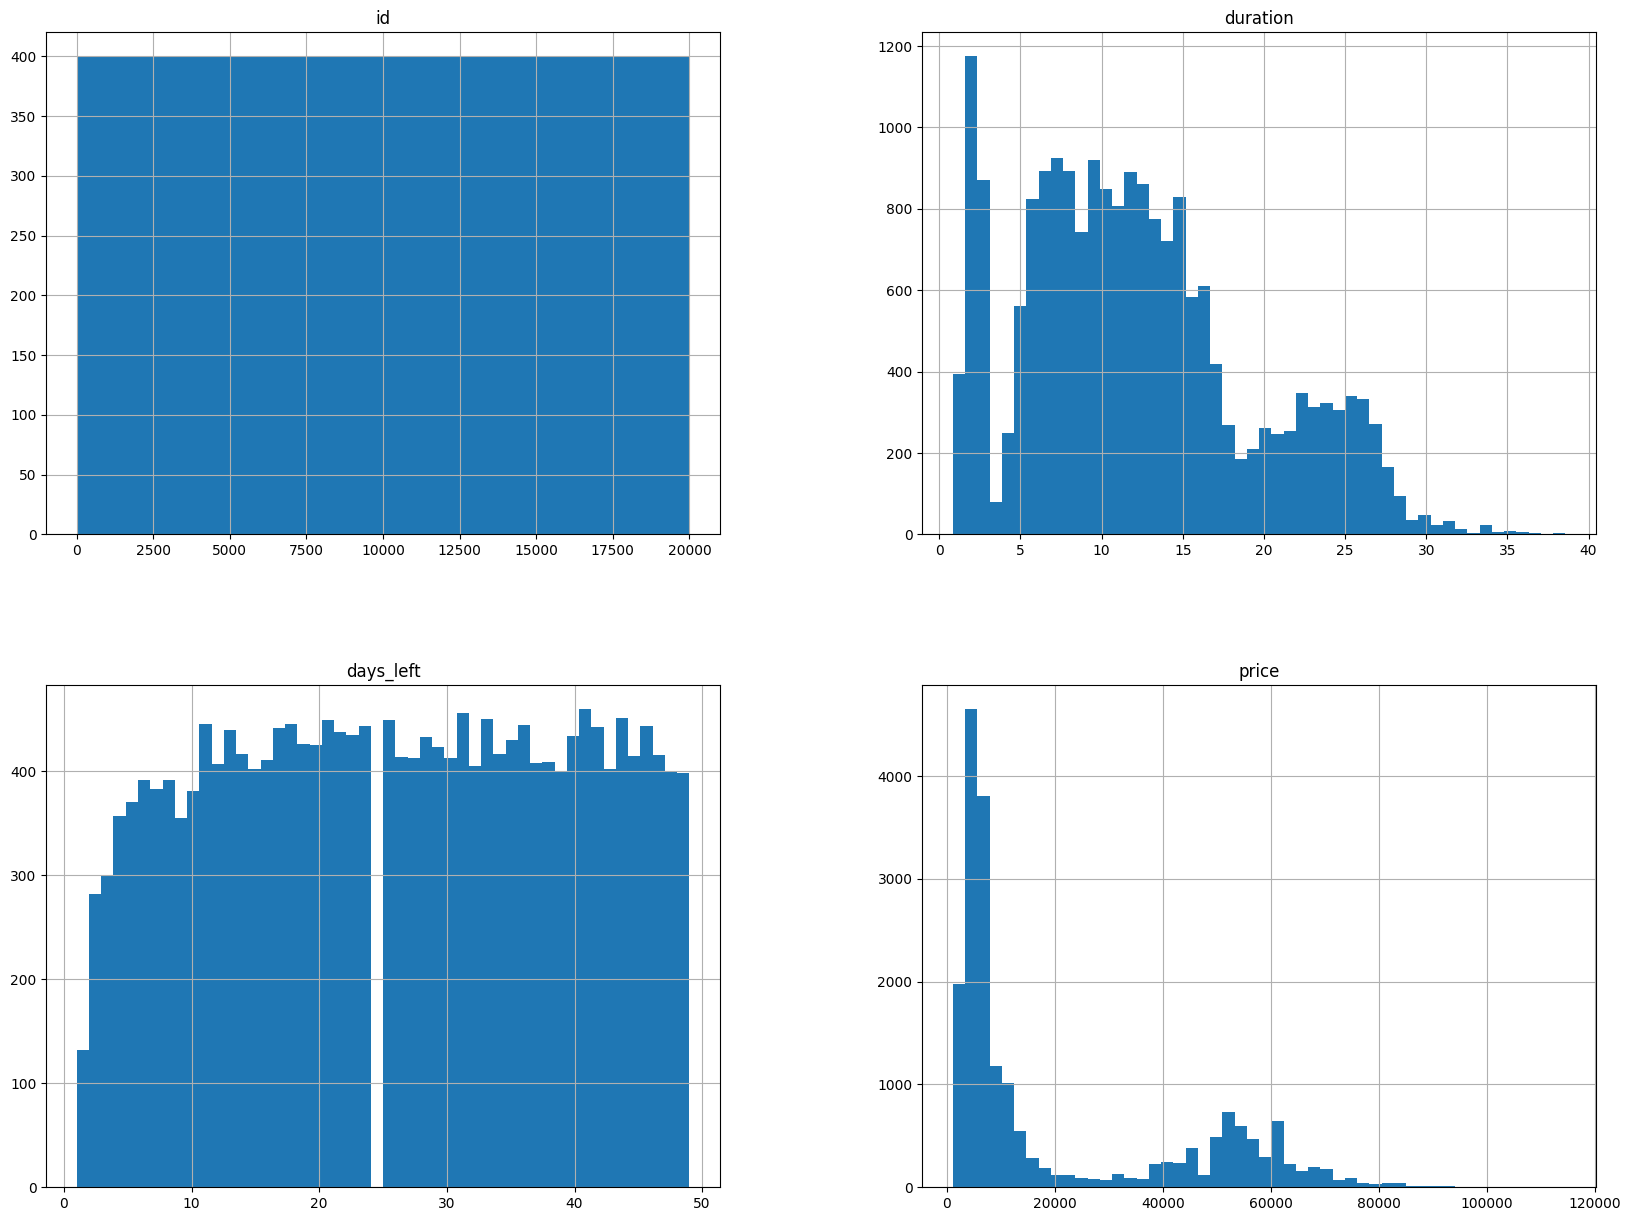

In [15]:
# visualization

%matplotlib inline
train_df.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
train_df.columns

Index(['id', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

Preperation for Machine learning

In [17]:
train_df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [25]:
train_set, test_set = train_test_split(train_df, test_size=0.2, random_state=42)

In [22]:
x=train_set.drop(['price'],axis=1)
y=train_set['price']

In [23]:
numeric_col=['duration','days_left']
str_columns=['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class']

In [26]:
from sklearn.pipeline import Pipeline
numeric_pipeline = Pipeline([
          ('std_scaler', StandardScaler())
])

In [27]:
full_pipeline = ColumnTransformer([
    ('num', numeric_pipeline, numeric_col),
    ('cat', OneHotEncoder(handle_unknown='ignore'), str_columns)
])

train_last = full_pipeline.fit_transform(x)

Modeling

In [28]:
random_forest=RandomForestRegressor(random_state=42)
random_forest.fit(train_last,y)

RandomForestRegressor(random_state=42)

In [31]:
X_test=test_set.drop(['price'],axis=1)
Y_test=test_set['price']

In [32]:
full_pipeline.fit(x)

test_last = full_pipeline.transform(X_test)

test_predict = random_forest.predict(test_last)
test_predict

array([ 6173.82, 53011.82, 60237.41, ...,  5408.31, 74238.96,  2564.73])

In [33]:
MSE = mean_squared_error(Y_test, test_predict)
MAE = mean_absolute_error(Y_test, test_predict)
print("MAE:", MAE)
print(f'RMSE: {np.sqrt(MSE)}')

MAE: 1597.7622304107142
RMSE: 3415.1954141620618


In [34]:
test_f = full_pipeline.transform(test_df)

In [35]:
test_last = random_forest.predict(test_f)


In [36]:
test_last

array([51240.1 , 64926.97, 23242.54, ..., 50265.18, 50609.25, 65906.87])

In [40]:
pd.DataFrame({'Prognoz':test_predict, 'Real baxosi': Y_test})

,Prognoz,Real baxosi
10650,6173.82,5361
2041,53011.82,50297
8668,60237.41,60232
1114,79918.25,74365
13902,4659.86,4417
...,...,...
4073,8794.92,10228
7442,12228.31,12544
9999,5408.31,5276
1870,74238.96,79548


In [41]:
sample.to_csv('airpale_ticket_prediction.csv', index=False)